# Distance Based Models

## Overview

Distance-based algorithms are machine learning algorithms that used the distance between points as the core of decision making. as a supervised task we have **K-Nearest Neighbors** and as an unsupervised task, we have **clustering** methods that use distances for making decisions. before we talk about these tasks and methods let's talk about how we can calculate the distance between two points. there are 4 methods to do that:<br>
   1. Hamming Distance: calculate the distance between two binary vectors. good when we have one-hot encoded variables.
   2. Euclidean Distance: also called l2-norm, is the most commonly used method to calculate the distance between two real-valued vectors. it is also used as a loss function in other algorithms.<br>
   
   $${d(p,q)} = \sqrt{({p}_{i} - {q}_{i})^{2}}$$
   
   
   3. Manhattan Distance: also called l1-norm, used for real-valued vectors. also used as a loss function in other algorithms.<br>
   
    $${d(p,q)} = \vert{{p}_{i} - {q}_{i}}\vert$$ 
    
   
   4. Minkowski Distance: used for real-valued vectors. it is a generalization of Euclidean and Manhattan distances. it has parameter ${p}$, if ${p} = 1$ it is Manhattan and if ${p} = 2$ it is Euclidean distance.<br>

so in our problems, we can use any of these distances and by that, we will get a different result so it can also be treated as a hyperparameter.<br>
let's talk about some distance-based algorithms and also talk about clustering.

## K Nearest Neighbors

K Nearest Neighbors (KNN) is a non-parametric supervised machine learning algorithm that is used for both regression and classification tasks. in this method, we just store all the points in the training dataset in the memory, when the new point comes we calculate the distance between the new point and other points and find ${K}$ of points with the lowest distance. then for classification, we use voting and for regression, we use averaging between these ${K}$ points as our prediction.<br>
this method does nothing until the prediction phase and just stores points, so for big datasets, we need big memory to store our points. our only hyperparameter is ${K}$ (or we can use different methods to calculate distance), so it is easy to tune and also interpretable. but as you can imagine it cant solve complex problems.

### Pseudo code for KNN

1. Calculate the distance between all the points in testing data and points in training data (here I will use euclidean distance).
2. find k of our points in training data with the lowest distance measured in step 1.
3. find the value of these k points and use the majority vote for classification and averaging for regression, as our prediction.

### KNN From Scratch

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading data, scaling and split
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [3]:
k = 3 # number of neigbors
y_predict = []
for i in range(len(X_test)):
    Delta = X_train - X_test[i] # different between each sample in test set and training set
    sum_squ = np.sum(np.square(Delta),axis=1) # sum of square of differences
    Distance = np.sqrt(sum_squ) # calculating distance (Euclidean distance)
    k_index = np.argsort(Distance)[:k] # sort distances and return index of that sample and pick k of them
    nn_values = y_train[k_index] # value of those neighbors in our y_train
    y_predict.append(np.argmax(np.bincount(nn_values))) # pick maximum and assign it as our prediction

In [4]:
y_predict = np.array(y_predict) # our prediction matrix for all the test samples
y_predict.shape

(114,)

In [5]:
accuracy = np.sum(y_predict == y_test)/len(y_test) # accuracy
accuracy

0.9824561403508771

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

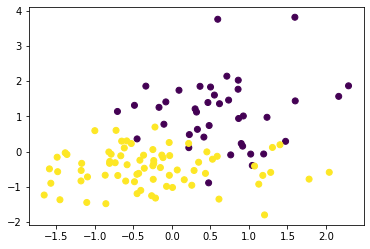

In [7]:
plt.scatter(X_test[:,1],X_test[:,0],c=y_predict)

### Implementing in Scikit Learn

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [10]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9824561403508771

## Clustering

Clustering is the task of dividing data into numbers of groups in which points in each group should be similar to each other and points in different groups should be different. it is an unsupervised task so our data are unlabeled and we want to find meaningful structure in them. we can use clustering for data exploration, market segmentation, recommendation systems, etc. we can divide clustering methods into 4 groups:<br>
1. Partitioning Methods (K-means)
2. Hierarchical-Based Methods
   * Agglomerative
   * Divisive
3. Density-Based Methods (DBSCAN, OPTICS)
4. Grid-based Methods<br>

let's talk about some of these methods and implement them using scikit learn.

### K-Means Clustering

in k-means clustering, we have ${K}$ number of clusters, and for assigning points to clusters, we calculate the distance between each point and cluster centroids and pick the cluster with the lowest distance. but how to choose ${K}$? well there are some methods like the elbow method or silhouette coefficient to determine the proper number of clusters according to your data but the best way is to use domain knowledge. also sometimes we are running clustering for downstream purposes, we can evaluate our k-means based on a metric for how well it performs for that later purpose. we can perform k-means with these steps:
   1. pick the number of cluster ${k}$
   2. pick ${k}$ random points as the cluster center
   3. while cluster center change (or change less than some threshold):
       * assign each point to its closest cluster center
       * recompute cluster center as the mean of assigned points.<br>
   **NOTE**: each time we perform these steps because we are initializing randomly we end up with different results so we have to perform these steps several times and pick one with the lowest cost function. cost function can be defined as the sum of distances between each point and its assign cluster center:<br>
   
   $${J} = \sum_{i} ||{x}_{i} - {c}_{xi}||^{2}$$<br>

**Some Pros and Cons**:<br>
* it only can cluster simple shape
* it is easy to implement
* it is sensitive to outliers

#### Implementing K-means in scikit learn

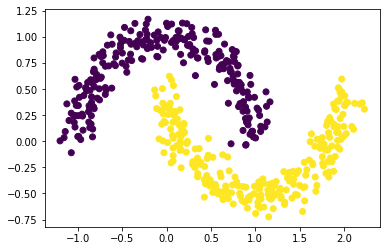

In [11]:
# loading our dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.1)
plt.scatter(X[:,0],X[:,1],c=y)
# this is the output we try to get using clustering

In [12]:
from sklearn.cluster import KMeans
import numpy as np
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

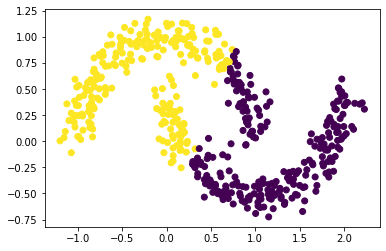

In [13]:
plt.scatter(X[:,0],X[:,1],c=km.labels_)

### Agglomerative Clustering

in this method, we don't need to specify the number of clusters. at first, all the points are considered as a cluster, then most similar clusters start to merge and construct bigger clusters until they reach some criteria called **linkage criteria**. these criteria are:
   * Single Linkage: smallest minimum distance between points in the cluster.
   * Average Linkage: smallest average distance between all the pairs in the clusters.
   * Complete Linkage: smallest maximum distance between points in clusters.
   * Ward: smallest increase in within-cluster variance, which leads to more equally sized clusters.<br>
**NOTE**: we also can specify the number of clusters for this method and it will be merge points until we reach that number. if we don't do that we need to specify some distance threshold so that our algorithm knows when to stop by calculating criteria.<br>

**Some Pros and Cons**<br>
* don't need to specify the number of clusters.
* some linkage criteria lead to very unbalanced cluster sizes, so we can cluster more complex shapes compare to k-means.
* These are graph-based methods and can visualize them using dendrograms.
* by where we start merging our points we can end up with different clusters. 

#### Implementing Agglomerative Clustering in scikit learn

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
aggc = AgglomerativeClustering(n_clusters=None,linkage='ward',distance_threshold=15)
aggc.fit(X)

AgglomerativeClustering(distance_threshold=15, n_clusters=None)

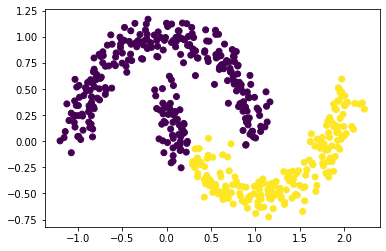

In [16]:
plt.scatter(X[:,0],X[:,1],c=aggc.labels_)

### DBSCAN

Density Based Spatial Clustering of Applications with noise is the algorithm that uses density for finding clusters. for defining density this method create a circle for scan points and has two parameters:
   * epsilon ($\epsilon$): the radius of the circle
   * Minimum number of samples <br>

by using these two parameters our algorithm scan all the points in the data and:
   * if our circle around the data point contains at least min_samples it will call it **Core Point**
   * if our points are in the circle of any core points but do not satisfy min_sample criteria, it will call it **Border Point**.
   * if our points are not in the circle of any core points, it will call it **Noise Point**.<br>

so DBSCAN algorithm:<br>
1. find all the core points in our data set.
2. then randomly pick one of the core points and start merging the point to cluster by using its circle. only core points and border points will assign to clusters and noise points won't assign to any clusters.
3. after merging points using its circle with radius epsilon, if there are still core points that are not assigned to any clusters, it will again pick one randomly and perform step 2 and create a new cluster until all core points and border points are assigned to clusters.<br>
**NOTE**: by increasing the min_sample number fewer points will be assigned as core points(determine types of points) and by increasing $\epsilon$ fewer clusters will be constructed (determine spread of cluster), but together they determine the size and number of clusters, so we have to tune them for our specific dataset.<br>

**Some Pros and Cons**<br>
* it is not sensitive to outliers and we can even find them.
* This method is good to divide data with arbitrary cluster shapes and great for separating clusters of high density vs clusters of low density within the dataset.
* it struggles with clusters with similar density.
* We need to tune 2 parameters.
* like Agglomerative Clustering, because we pick core points randomly, each time we can end up with different clusters.

#### Implementing DBSCAN in scikit learn

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN(eps=0.15,min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=7)

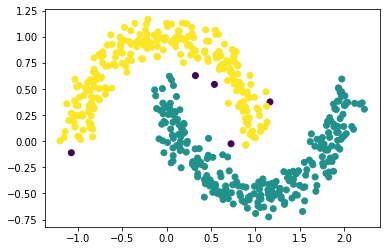

In [19]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

as you can see with these 2 parameter DBSCAN divide our data into 2 clusters, and also specify some of the points as outliers (purple points).

### Final note on clustering

as you can see in this dataset DBSCAN does better than other methods, but in another dataset that may not be true. so for each dataset, we have to find the proper method for clustering. how to decide which one is better? always look at your downstream purpose. why are you doing clustering? and see which method gives you a better result for that purpose.

## Kernels

### Kernel Density Estimation (unsupervised method that using kernels)

### Support Vector Machines (supervised methods that using kernels)